<a href="https://colab.research.google.com/github/saazalll/Placement-Prediction/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


1. Preprocess + EDA + Feature selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Evaluate the model/model selection
6. Deploy the model

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [8]:
import matplotlib.pyplot as plt

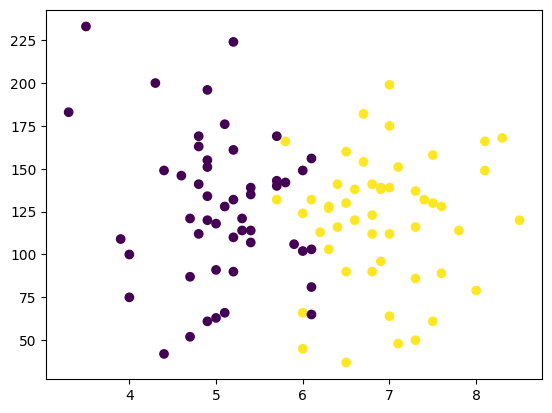

In [16]:
plt.scatter(df['CGPA'],df["IQ"],c=df['Placement'])

logistic regression is used

In [19]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [20]:
X

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [22]:
y.shape

(100,)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [25]:
X_train

,CGPA,IQ
36,5.7,140
10,6.0,45
48,6.6,138
53,8.3,168
33,6.0,149
...,...,...
18,4.0,100
2,5.3,121
92,5.2,110
21,7.1,151


In [26]:
y_train

36    0
10    1
48    1
53    1
33    0
     ..
18    0
2     0
92    0
21    1
58    1
Name: Placement, Length: 90, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [30]:
X_train

array([[-0.19298127,  0.40144041],
       [ 0.06885261, -1.95753934],
       [ 0.59252039,  0.35177768],
       [ 2.07624574,  1.09671866],
       [ 0.06885261,  0.62492271],
       [-1.06576089, -1.78371978],
       [-0.89120497, -1.56023749],
       [-2.28765236,  1.46918914],
       [ 0.76707631,  0.42627178],
       [-0.89120497,  0.7739109 ],
       [-0.45481516,  0.37660905],
       [ 0.94163223,  0.37660905],
       [ 0.85435427, -0.69113968],
       [-0.97848293,  1.12155002],
       [-0.89120497,  1.7919969 ],
       [-1.41487274,  1.89132236],
       [-0.10570331,  1.04705593],
       [ 1.29074408,  0.20278949],
       [-0.97848293, -0.29383783],
       [-0.71664904,  0.10346402],
       [-0.62937108,  0.20278949],
       [-0.803927  , -1.51057475],
       [-2.11309643,  2.71075744],
       [ 1.4653    ,  0.10346402],
       [ 1.20346612, -1.83338251],
       [-0.71664904, -1.43608066],
       [ 0.50524242, -2.15619027],
       [ 1.02891019, -1.88304524],
       [ 1.20346612,

In [31]:
X_test=scaler.fit_transform(X_test)

In [32]:
X_test

array([[-0.62437974,  1.00429631],
       [ 1.41686171, -0.21127848],
       [ 0.21613145, -0.26916299],
       [-1.46489092, -0.41387427],
       [ 1.05664263,  0.25179763],
       [-1.94518303, -0.09550945],
       [ 0.4562775 , -1.65839132],
       [ 0.21613145, -0.90589264],
       [ 0.21613145,  0.04920184],
       [ 0.4562775 ,  2.24881336]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf =LogisticRegression()

In [36]:
#model training


In [37]:
clf.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred=clf.predict(X_test)

In [39]:
y_test

8     0
55    1
93    1
81    0
83    1
67    0
64    1
35    1
0     1
26    1
Name: Placement, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [43]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

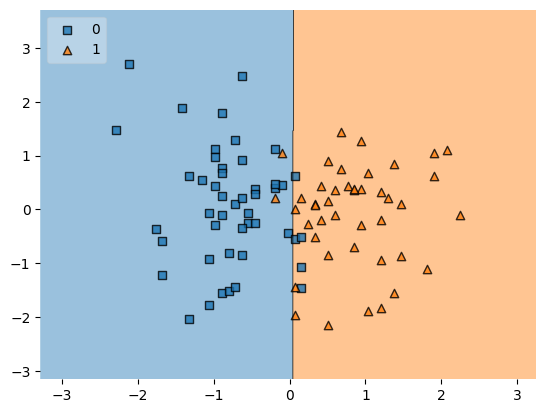

In [45]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [46]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))